In [65]:
from IPython.display import display, Markdown
import re
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('results.csv')
df.head(1)

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,consortium[berd],consortium[daphne4nfdi],consortium[dataplant],...,metadata[other],ontologies,sourcecode[none],sourcecode[private],sourcecode[gitlab],sourcecode[github],sourcecode[unsure],sourcecode[other],forward,contact
0,3,NaN,NaN,en,1373688864,2025-03-03 10:24:40,2025-03-03 10:24:40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df["startdate"] = pd.to_datetime(df["startdate"]).dt.date
date_series = df["startdate"].dropna()
mindate = date_series.min()
maxdate = date_series.max()
display("The survey responses were submitted between "+mindate.strftime('%d %B %Y')+" and "+maxdate.strftime('%d %B %Y')+".")


'The survey responses were submitted between 03 March 2025 and 24 March 2025.'

{'NFDI4ING': 10,
 'NFDI4CAT': 9,
 'NFDI4BIODIVERSITY': 8,
 'NFDI4CHEM': 6,
 'NFDIMATWERK': 6,
 'TEXT': 6,
 'BERD': 5,
 'NFDI4IMMUNO': 4,
 'NFDI4DATASCIENCE': 4,
 'KONSORTSWD': 4,
 'NFDI4MICROBIOTA': 3,
 'NFDI4HEALTH': 3,
 'NFDI4BIOIMAGE': 2,
 'NFDI4ENERGY': 2,
 'NFDI4CULTURE': 2,
 'NFDI4MEMORY': 1,
 'NFDI4OBJECTS': 1,
 'GHGA': 1,
 'NFDI4EARTH': 1,
 'DATAPLANT': 1,
 'FAIRMAT': 1,
 'FAIRAGRO': 0,
 'OTHER': 0,
 'NFDIXCS': 0,
 'PUNCH4NFDI': 0,
 'MARDI': 0,
 'DAPHNE4NFDI': 0}

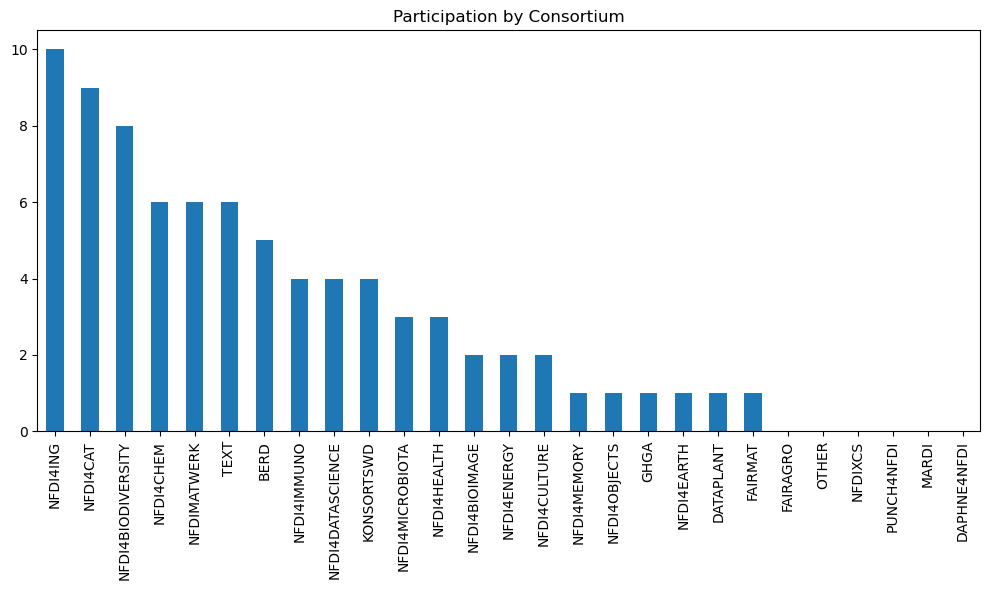

In [79]:
def col_count(prefix):
    cols = {col for col in df.columns if isinstance(col, str) and col.startswith(prefix)}
    counts = {}
    for col in cols:
            new_col_name = re.sub(r"consortium\[(.*)\]", lambda m: m.group(1).upper(), col)
            counts[new_col_name] = int((df[col] == 'Y').sum())
    return counts
    
#cons_cols = {col for col in df.columns if isinstance(col, str) and col.startswith("consortium")}
#consortia = {re.sub(r"consortium\[([^)]*)\]", lambda m: m.group(1).upper(), col) for col in consortia_cols}
#cons_counts = {}
#for col in cons_cols:
#new_col_name = re.sub(r"consortium\[(.*)\]", lambda m: m.group(1).upper(), col)
#        cons_counts[new_col_name] = int((df[col] == 'Y').sum())
cons_counts = col_count("consortium")
sorted_counts  = dict(sorted(cons_counts.items(), key=lambda item: item[1], reverse=True))
display(sorted_counts)
pd.Series(sorted_counts).plot(kind='bar', figsize=(10, 6), rot=90, title="Participation by Consortium")
plt.tight_layout()
plt.show()

{'manage': 35,
 'researcher': 33,
 'developer': 25,
 'administrator': 10,
 'steward': 6,
 'unsure': 3,
 'other': 0}

'Most participants identified their role as manager (35), researcher (33) or developer (25) with a few administrators (10) and stewards (6).'

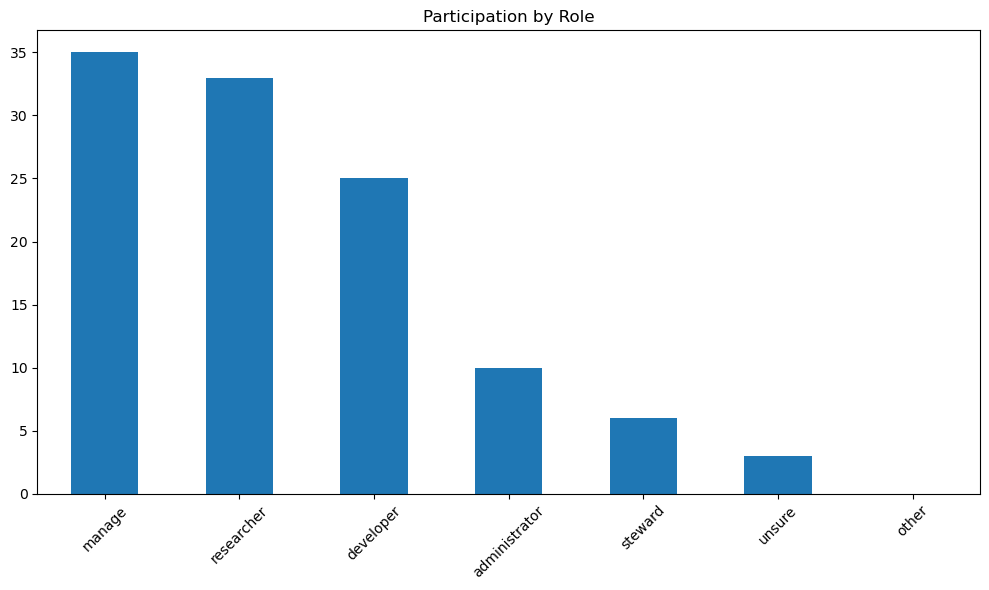

In [73]:
role_cols = {col for col in df.columns if isinstance(col, str) and col.startswith("role")}
role_counts = {}
for col in role_cols:
        new_col_name = re.sub(r"role\[(.*)\]", lambda m: m.group(1), col)
        role_counts[new_col_name] = int((df[col] == 'Y').sum())
sorted_counts  = dict(sorted(role_counts.items(), key=lambda item: item[1], reverse=True))
display(sorted_counts)
display("Most participants identified their role as manager ("+str(sorted_counts["manage"])+"), researcher ("+str(sorted_counts["researcher"])+") or developer ("+str(sorted_counts["developer"])+") with a few administrators ("+str(sorted_counts["administrator"])+") and stewards ("+str(sorted_counts["steward"])+").")
pd.Series(sorted_counts).plot(kind='bar', figsize=(10, 6), rot=45, title="Participation by Role")
plt.tight_layout()
plt.show()